## Problem Statement

#### classify the Size Categories using  Support Vector Machines.

### Import all the required libraries

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC

from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [17]:
df_ff = pd.read_csv("forestfires.csv")
df_ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [18]:
df_ff['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [19]:
LE = preprocessing.LabelEncoder()
  
df_ff['size_category']= LE.fit_transform(df_ff['size_category'])
df_ff['day']= LE.fit_transform(df_ff['day']) 
df_ff['month']= LE.fit_transform(df_ff['month'])

In [20]:
df_ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
df_ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [22]:
df_ff.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_ff.shape

(517, 31)

In [24]:
df_ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## Visualization

<AxesSubplot: xlabel='month', ylabel='FFMC'>

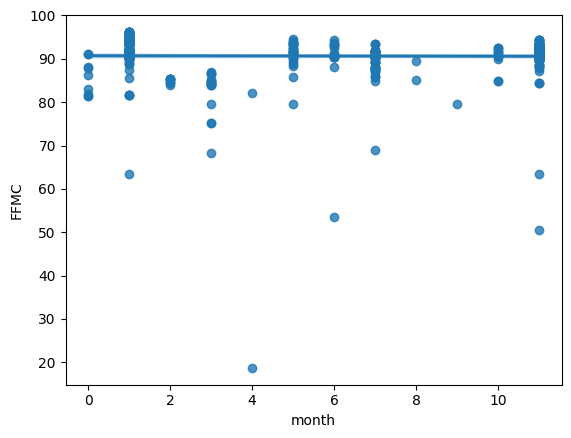

In [25]:
sns.regplot(x= 'month',y= 'FFMC', data=df_ff) 

<AxesSubplot: >

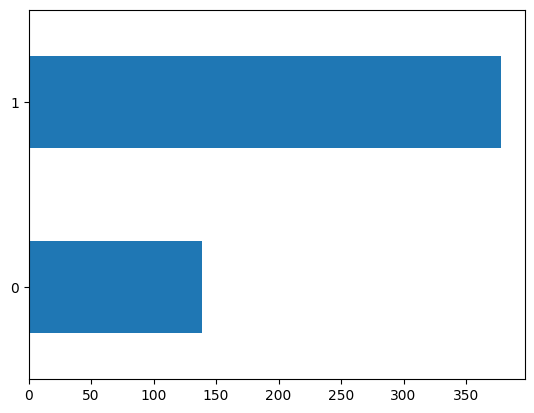

In [26]:
df_ff.size_category.value_counts(ascending=True).plot(kind='barh')

In [ ]:
sns.pairplot(df_ff)

<AxesSubplot: xlabel='size_category', ylabel='Density'>

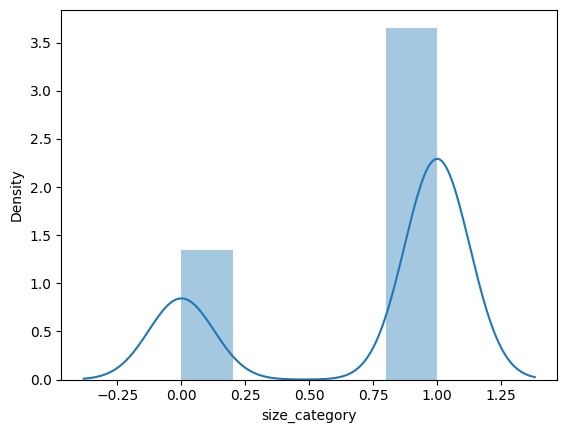

In [27]:
sns.distplot(df_ff['size_category'])

<AxesSubplot: xlabel='FFMC', ylabel='Density'>

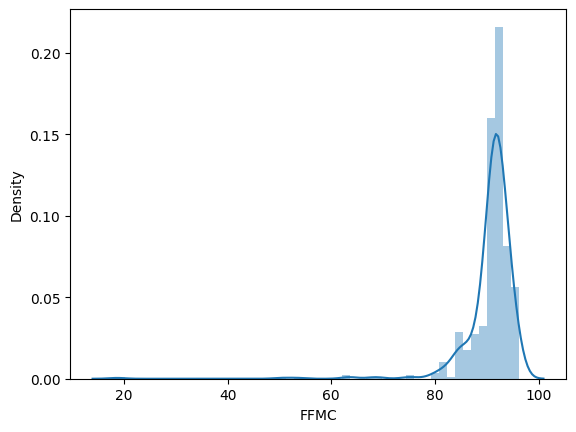

In [28]:
sns.distplot(df_ff['FFMC'])

<AxesSubplot: >

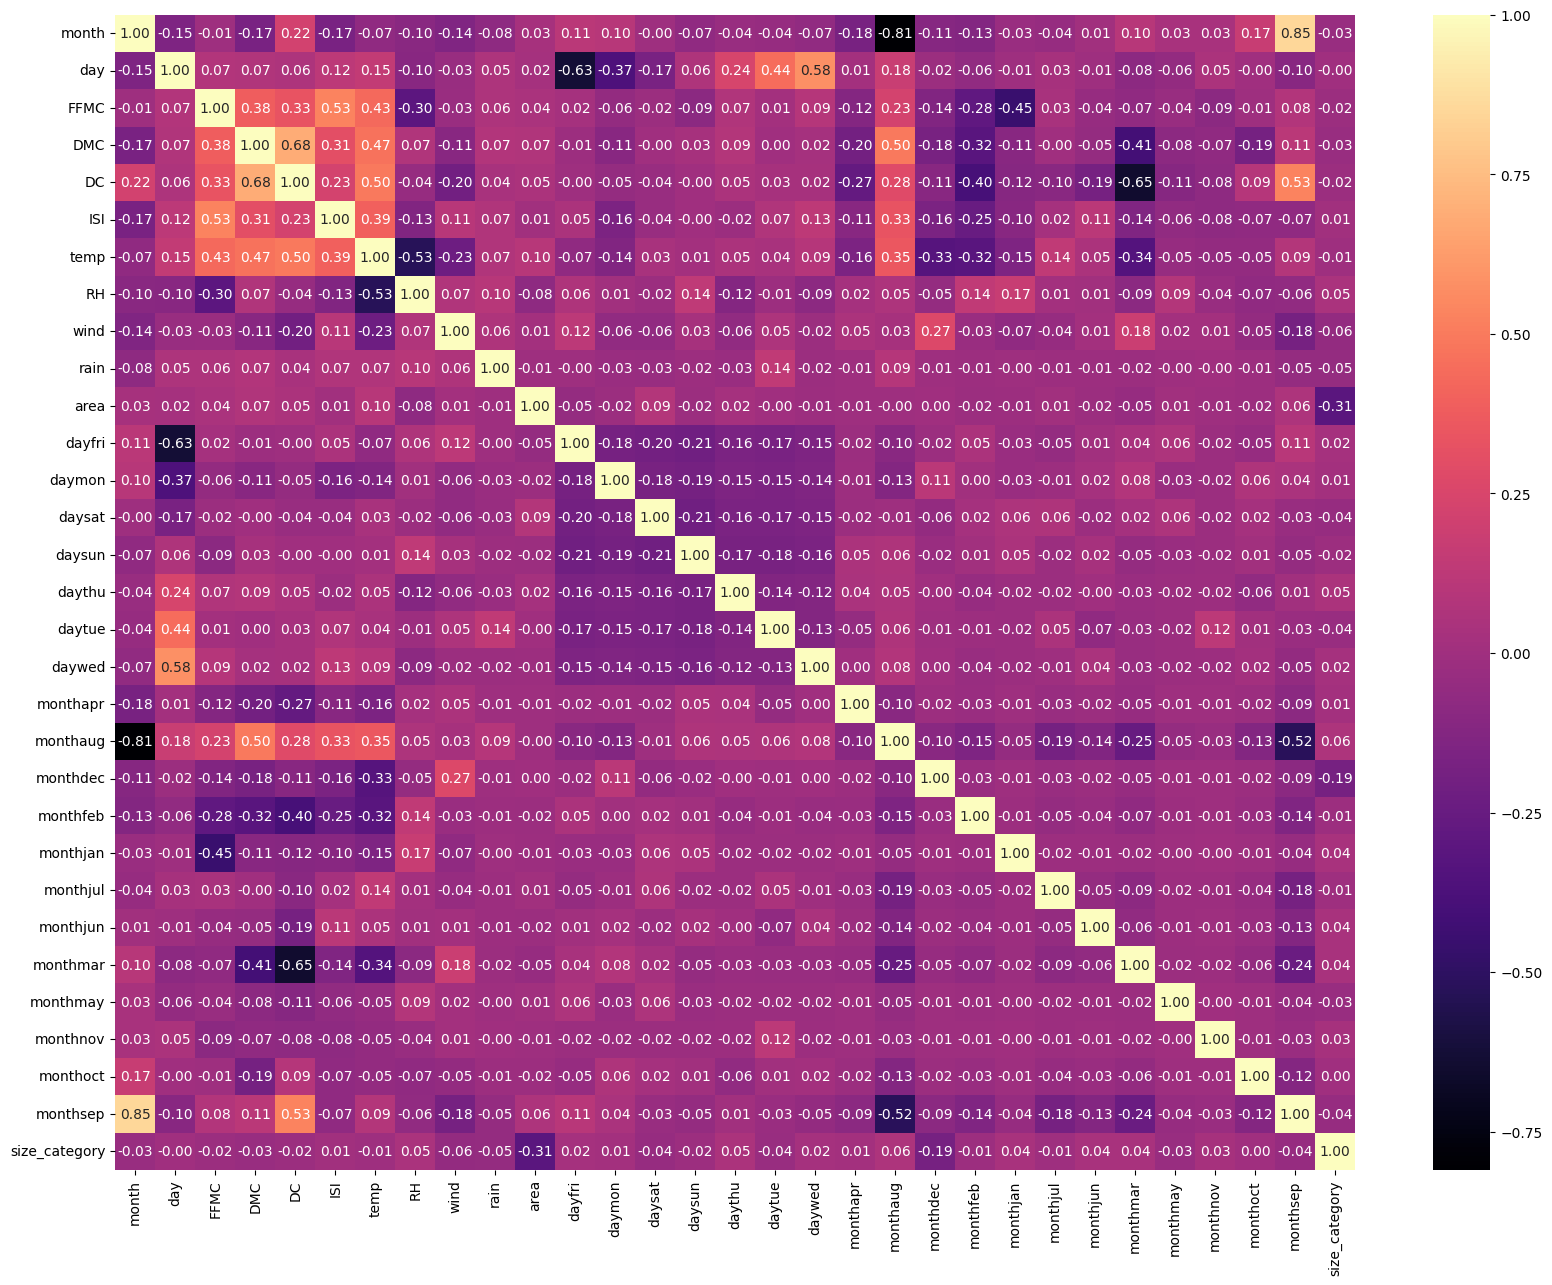

In [29]:
plt.figure(figsize = (20, 15));
sns.heatmap(df_ff.corr(), cmap='magma', annot=True, fmt=".2f")

<AxesSubplot: xlabel='FFMC', ylabel='temp'>

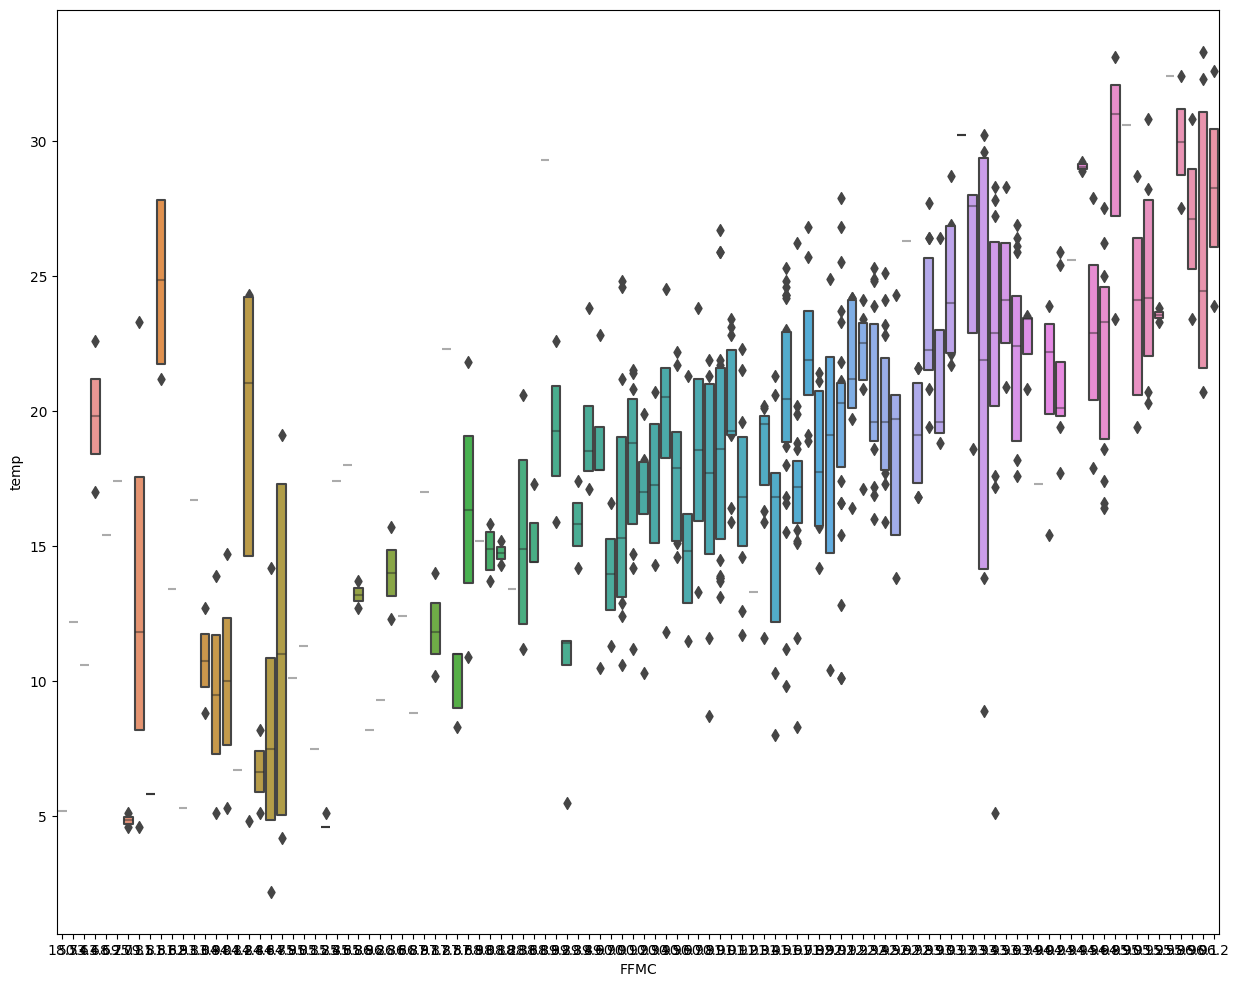

In [30]:
plt.figure(figsize = (15, 12));
sns.boxenplot(x = 'FFMC', y = 'temp', data = df_ff)

<AxesSubplot: xlabel='temp', ylabel='wind'>

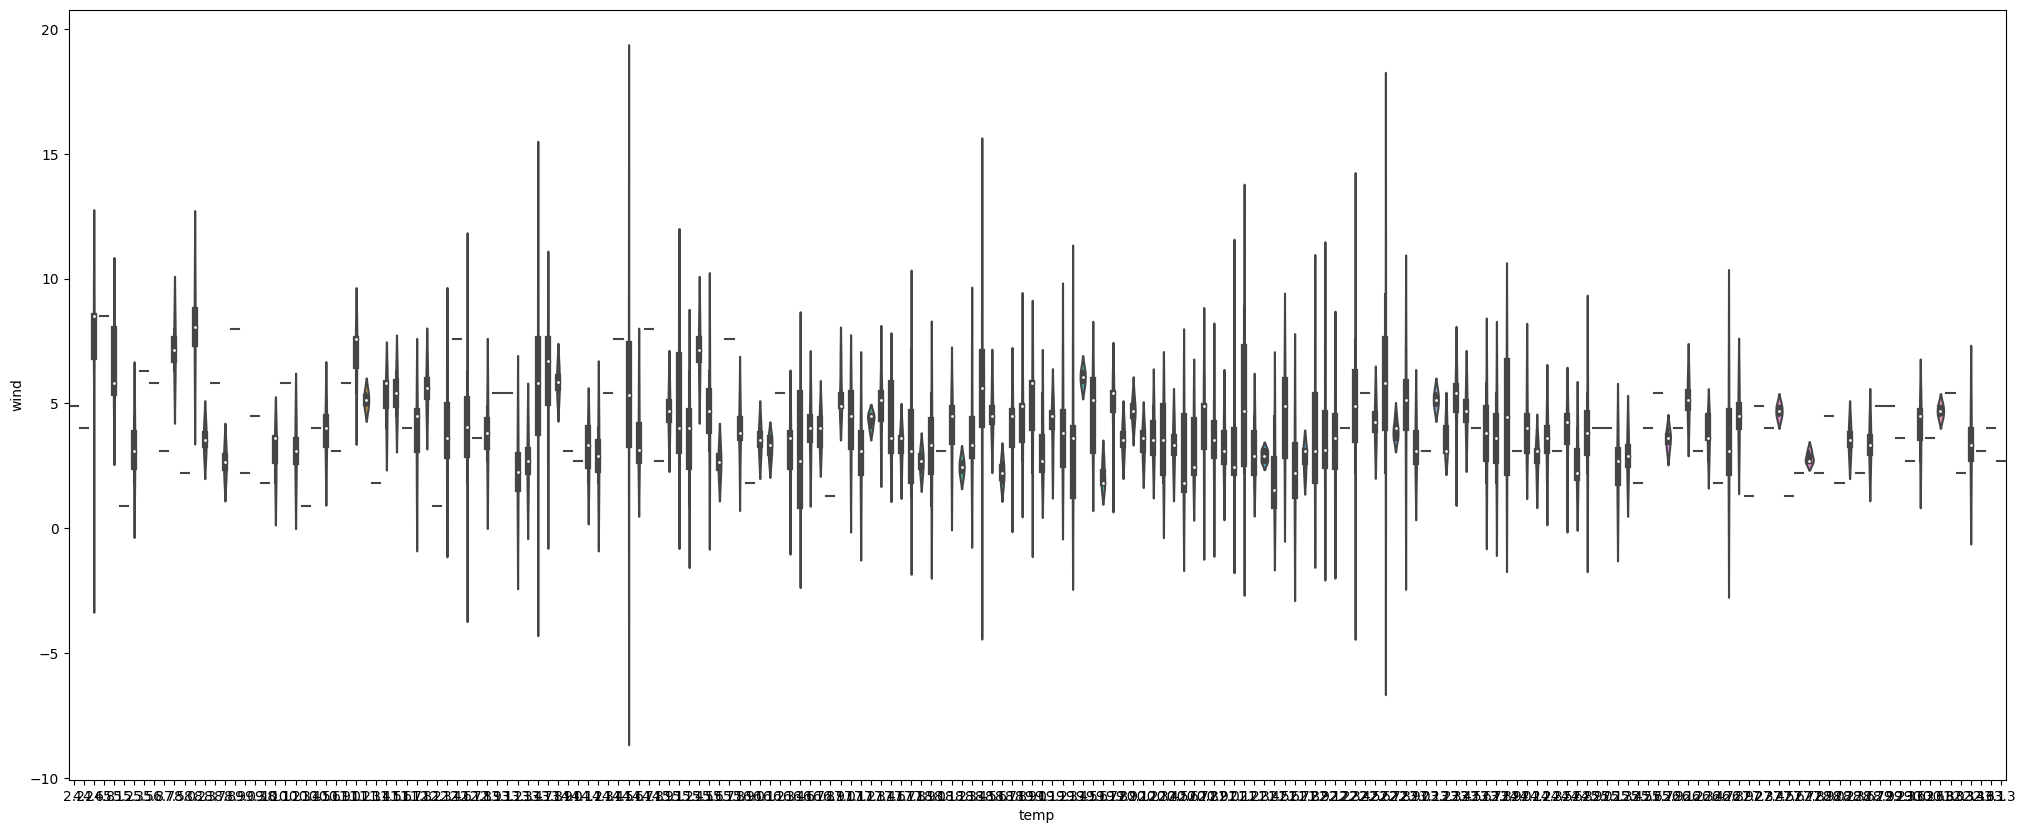

In [31]:
plt.figure(figsize = (25, 10));
sns.violinplot(x ="temp",
             y ="wind",
             style ="event",
             data = df_ff)

In [32]:
x = df_ff.iloc[:,:-1]
y = df_ff.iloc[:,-1]

### Grid Search CV 

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=15)

In [34]:
clf = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [35]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.9058558558558559)

### Model Building 

In [36]:
clf = SVC(C= 14, gamma = 0.0001,kernel="rbf")
clf.fit(x_train,y_train)

SVC(C=14, gamma=0.0001)

In [37]:
y_pred = clf.predict(x_test)
acc = round(accuracy_score(y_test, y_pred)*100,2)
print("accuracy=",acc)
print()
print(classification_report(y_test, y_pred))

accuracy= 91.67

              precision    recall  f1-score   support

           0       0.97      0.72      0.83        43
           1       0.90      0.99      0.95       113

    accuracy                           0.92       156
   macro avg       0.94      0.86      0.89       156
weighted avg       0.92      0.92      0.91       156

